# Percolation analysis

* read a network
* drop the links
* add links based on some measure (for example, link weight)

* we measure on scale (0-1) how quickly they make a one complete component
* Percolation = |N_LCC|/|N|


In [1]:
import pandas as pd 
import networkx as nx
import os
from DA import pls_da
datasets = ["\dolphins\dolphins.gml",
            "\polbooks\out2.txt",
            "\word_adjacencies.gml\word_adjacencies.gml",
            "\\arenas-email\\out2.txt",
            "Karate",
            "Erdos Renyi",
            "\\USAir97\\USAir97.mtx", 
            "\\circuits\s208_st.txt",
            "\\circuits\s420_st.txt",
            "\\circuits\s838_st.txt",
            "\\E. Coli\E. Coli.txt",
            "Barabasi_albert_graph",
            "\\facebook\\0.edges",
            "\\facebook\\107.edges",
            "\\facebook\\348.edges",
            "\\facebook\\414.edges",
            "\\facebook\\686.edges",
            "\\facebook\\1684.edges",
            "\\bio-celegans\\bio-celegans.mtx",
            "\\bn-macaque-rhesus_brain_2\\bn-macaque-rhesus_brain_2.txt",
            '\\soc-tribes\\soc-tribes.txt',
            '\\fb-pages-food\\fb-pages-food.txt',
            '\\bn-cat-mixed-species_brain_1\\bn-cat-mixed-species_brain_1.txt',
            '\\ca-sandi_auths\\ca-sandi_auths.mtx',
            '\\soc-firm-hi-tech\\soc-firm-hi-tech.txt']

def read_graph2(g):
    file_name = 'standard networks dataset' + datasets[int(g)]
    print(file_name)
    G = nx.Graph()
    if g==4:
        G = nx.karate_club_graph()
    elif g==5:
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        G = nx.gnm_random_graph(500, 1500)
    elif g==11:
        # nodes = int(input("enter number of nodes?"))
        # edges= int(input("enter number of edges?"))
        # p = int(input("enter P value?"))
        G = nx.barabasi_albert_graph(500, 3)
    else:
        ext = os.path.splitext(file_name)[1]
        if ext=='.edges':
            G = nx.read_adjlist(file_name, create_using = nx.Graph(), nodetype = int)
        elif ext=='.gml':
            G = nx.read_gml(file_name)
        elif ext=='.mtx':
            G = None
            #matrix = scipy.io.mmread(file_name)
            #G = nx.from_scipy_sparse_matrix(matrix)
        elif ext=='.txt':
            file = open(file_name, 'r')
            lines=  file.readlines()
            G = nx.Graph()
            for line in lines:
                if " " in line:
                    N = line.split(" ")
                else:
                    N = line.split("\t")
                G.add_edge(N[0], N[1])
    return G

# read the networks
networks = {}
for net in range(len(datasets)):
    g = read_graph2(net)
    if g:
        networks[datasets[net]] = g


standard networks dataset\dolphins\dolphins.gml
standard networks dataset\polbooks\out2.txt
standard networks dataset\word_adjacencies.gml\word_adjacencies.gml
standard networks dataset\arenas-email\out2.txt
standard networks datasetKarate
standard networks datasetErdos Renyi
standard networks dataset\USAir97\USAir97.mtx
standard networks dataset\circuits\s208_st.txt
standard networks dataset\circuits\s420_st.txt
standard networks dataset\circuits\s838_st.txt
standard networks dataset\E. Coli\E. Coli.txt
standard networks datasetBarabasi_albert_graph
standard networks dataset\facebook\0.edges
standard networks dataset\facebook\107.edges
standard networks dataset\facebook\348.edges
standard networks dataset\facebook\414.edges
standard networks dataset\facebook\686.edges
standard networks dataset\facebook\1684.edges
standard networks dataset\bio-celegans\bio-celegans.mtx
standard networks dataset\bn-macaque-rhesus_brain_2\bn-macaque-rhesus_brain_2.txt
standard networks dataset\soc-tribes

In [2]:
name = ['dolphins',
 'polbooks',
 'word_adjacencies',
 'arenas-email',
 'Karate',
 'Erdos Renyi',
 'circuits s208_st',
 'circuits s420_st',
 'circuits s838_st',
 'E. Coli',
 'Barabasi_albert_graph',
 'facebook0',
 'facebook107',
 'facebook348',
 'facebook414',
 'facebook686',
 'facebook1684',
 'bn-macaque-rhesus_brain_2',
 'soc-tribes',
 'fb-pages-food',
 'bn-cat-mixed-species_brain_1',
 'soc-firm-hi-tech']

In [28]:
def properties(G):
    GCC = nx.transitivity(G)
    ACC = nx.average_clustering(G)
    d = nx.density(G)
    r = nx.degree_assortativity_coefficient(G)    
    lcg = sorted(nx.connected_components(G), key=len, reverse=True)
    LCG = G.subgraph(lcg[0])    
    ASP = nx.average_shortest_path_length(LCG)
    diam = nx.diameter(LCG)
    return  GCC, ACC, d, r, ASP, diam



In [3]:
def weighted_edges(G, C):
    '''return a weighted edges'''
    W = []
    for u,v in G.edges():
        W.append([u, v, C[u]*C[v]])
    return sorted(W, key=lambda x: x[2])

def batch_list(lst):
    """
    Divide a list into batches of an equal number of items (as close to 50 as possible).
    """
    batch_size = (len(lst) + 49) // 50  # Calculate the batch size
    num_batches = (len(lst) + batch_size - 1) // batch_size
    batches = [lst[i*batch_size:(i+1)*batch_size] for i in range(num_batches)]
    return batches

def simulation(centr):
    results = []
    for network in networks.keys():
        print(network)
        G0 = networks[network]
        bc_G0 = centr(G0)
        W = weighted_edges(G0, bc_G0)
        G = nx.Graph()
        G.add_nodes_from(G0.nodes())
        batches = batch_list(W)

        result = []
        for b in range(len(batches)):
            for u,v,_ in batches[b]:
                G.add_edge(u, v)
            largest_component = G.subgraph(max(nx.connected_components(G), key=len))
            result.append([b, len(largest_component)/len(G)])
        results.append(result)
    return results


In [4]:
def plot(results, title):
    import matplotlib.pyplot as plt
    fig = plt.figure(dpi=600)
    fig, ax = plt.subplots()
    markers = ['+', 'x', 'o', 's', 'd', 'D', '*'] # Add your desired markers here
    for d in range(len(results)):
        data = results[d]
        x = [item[0] for item in data]
        y = [item[1] for item in data]
        marker_idx = d % len(markers) # Choose marker based on index of the result
        ax.plot(x, y, marker=markers[marker_idx], linewidth=0.5, markersize=3, label=name[d])

    ax.set_xlabel('edges')
    ax.set_ylabel(r'$|N_{LCC}| / |N| $')
    ax.set_title(f'{title}-based weighted edges')
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


\dolphins\dolphins.gml
\polbooks\out2.txt
\word_adjacencies.gml\word_adjacencies.gml
\arenas-email\out2.txt
Karate
Erdos Renyi
\circuits\s208_st.txt
\circuits\s420_st.txt
\circuits\s838_st.txt
\E. Coli\E. Coli.txt
Barabasi_albert_graph
\facebook\0.edges
\facebook\107.edges
\facebook\348.edges
\facebook\414.edges
\facebook\686.edges
\facebook\1684.edges
\bn-macaque-rhesus_brain_2\bn-macaque-rhesus_brain_2.txt
\soc-tribes\soc-tribes.txt
\fb-pages-food\fb-pages-food.txt
\bn-cat-mixed-species_brain_1\bn-cat-mixed-species_brain_1.txt
\soc-firm-hi-tech\soc-firm-hi-tech.txt


<Figure size 3840x2880 with 0 Axes>

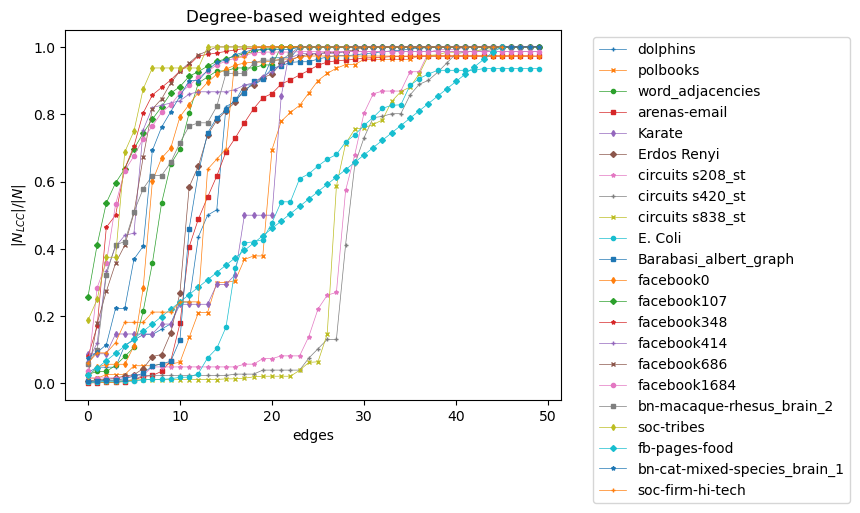

\dolphins\dolphins.gml
\polbooks\out2.txt
\word_adjacencies.gml\word_adjacencies.gml
\arenas-email\out2.txt
Karate
Erdos Renyi
\circuits\s208_st.txt
\circuits\s420_st.txt
\circuits\s838_st.txt
\E. Coli\E. Coli.txt
Barabasi_albert_graph
\facebook\0.edges
\facebook\107.edges
\facebook\348.edges
\facebook\414.edges
\facebook\686.edges
\facebook\1684.edges
\bn-macaque-rhesus_brain_2\bn-macaque-rhesus_brain_2.txt
\soc-tribes\soc-tribes.txt
\fb-pages-food\fb-pages-food.txt
\bn-cat-mixed-species_brain_1\bn-cat-mixed-species_brain_1.txt
\soc-firm-hi-tech\soc-firm-hi-tech.txt


<Figure size 3840x2880 with 0 Axes>

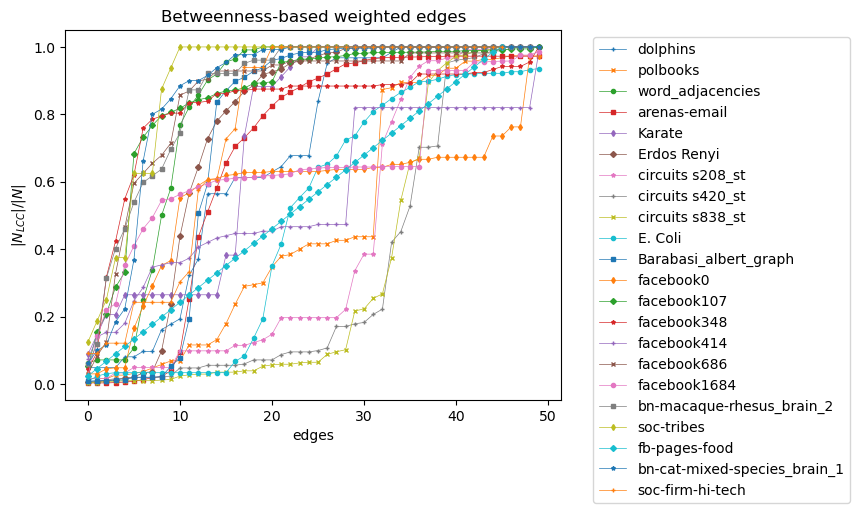

\dolphins\dolphins.gml
\polbooks\out2.txt
\word_adjacencies.gml\word_adjacencies.gml
\arenas-email\out2.txt
Karate
Erdos Renyi
\circuits\s208_st.txt
\circuits\s420_st.txt
\circuits\s838_st.txt
\E. Coli\E. Coli.txt
Barabasi_albert_graph
\facebook\0.edges
\facebook\107.edges
\facebook\348.edges
\facebook\414.edges
\facebook\686.edges
\facebook\1684.edges
\bn-macaque-rhesus_brain_2\bn-macaque-rhesus_brain_2.txt
\soc-tribes\soc-tribes.txt
\fb-pages-food\fb-pages-food.txt
\bn-cat-mixed-species_brain_1\bn-cat-mixed-species_brain_1.txt
\soc-firm-hi-tech\soc-firm-hi-tech.txt


<Figure size 3840x2880 with 0 Axes>

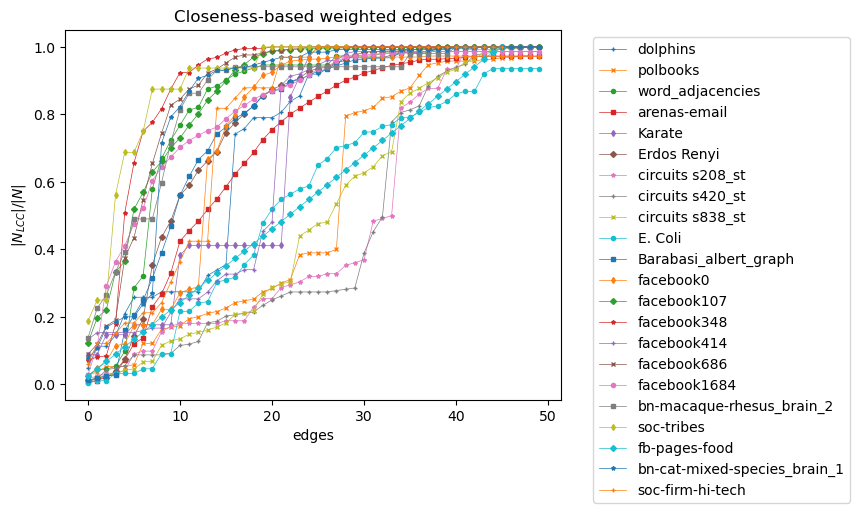

\dolphins\dolphins.gml
\polbooks\out2.txt
\word_adjacencies.gml\word_adjacencies.gml
\arenas-email\out2.txt
Karate
Erdos Renyi
\circuits\s208_st.txt
\circuits\s420_st.txt
\circuits\s838_st.txt
\E. Coli\E. Coli.txt
Barabasi_albert_graph
\facebook\0.edges
\facebook\107.edges
\facebook\348.edges
\facebook\414.edges
\facebook\686.edges
\facebook\1684.edges
\bn-macaque-rhesus_brain_2\bn-macaque-rhesus_brain_2.txt
\soc-tribes\soc-tribes.txt
\fb-pages-food\fb-pages-food.txt
\bn-cat-mixed-species_brain_1\bn-cat-mixed-species_brain_1.txt
\soc-firm-hi-tech\soc-firm-hi-tech.txt


<Figure size 3840x2880 with 0 Axes>

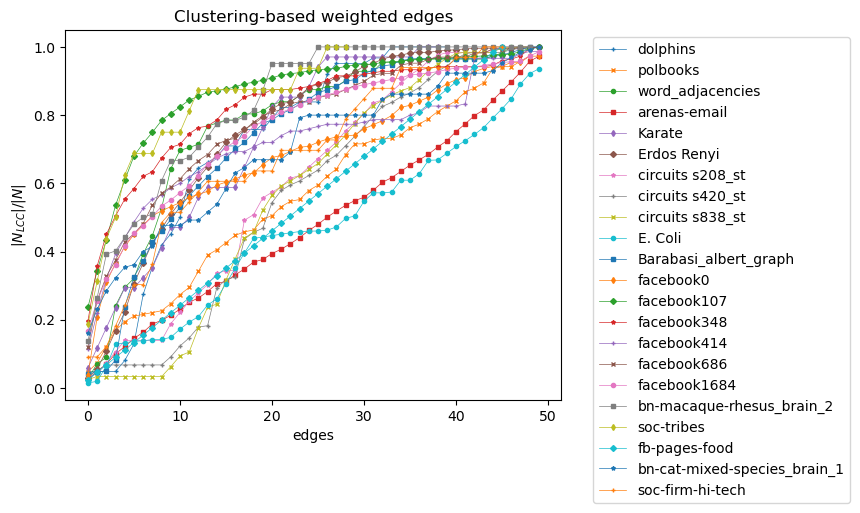

In [5]:
centralities = [nx.degree_centrality, nx.betweenness_centrality, nx.closeness_centrality, nx.clustering]
centr        = ['Degree'            ,   'Betweenness'          ,   'Closeness'          ,   'Clustering']
sims = {}
for i in range(4):
    cent = centr[i]
    sims[cent] = simulation(centralities[i])
    plot(sims[cent], cent)


In [6]:
sims

{'Degree': [[[0, 0.03225806451612903],
   [1, 0.04838709677419355],
   [2, 0.04838709677419355],
   [3, 0.04838709677419355],
   [4, 0.11290322580645161],
   [5, 0.12903225806451613],
   [6, 0.14516129032258066],
   [7, 0.14516129032258066],
   [8, 0.16129032258064516],
   [9, 0.1774193548387097],
   [10, 0.24193548387096775],
   [11, 0.24193548387096775],
   [12, 0.43548387096774194],
   [13, 0.5],
   [14, 0.5161290322580645],
   [15, 0.8225806451612904],
   [16, 0.8387096774193549],
   [17, 0.8870967741935484],
   [18, 0.8870967741935484],
   [19, 0.9032258064516129],
   [20, 0.967741935483871],
   [21, 0.967741935483871],
   [22, 0.967741935483871],
   [23, 1.0],
   [24, 1.0],
   [25, 1.0],
   [26, 1.0],
   [27, 1.0],
   [28, 1.0],
   [29, 1.0],
   [30, 1.0],
   [31, 1.0],
   [32, 1.0],
   [33, 1.0],
   [34, 1.0],
   [35, 1.0],
   [36, 1.0],
   [37, 1.0],
   [38, 1.0],
   [39, 1.0]],
  [[0, 0.015789473684210527],
   [1, 0.015789473684210527],
   [2, 0.02631578947368421],
   [3, 0.02

# Predicting robustness of networks

In [7]:
R = {}
R['Networks'] = name
for c in centr:
    Rs = []
    for i in range(22):
        S = sims[c][i]
        T, V = 0, 0
        for t, v in S:
            if v > V:
                T = t
                V = v
        Rs.append(T)
    R[c] = Rs
pd.DataFrame(R)

,Networks,Degree,Betweenness,Closeness,Clustering
0,dolphins,23,34,35,33
1,polbooks,36,46,47,48
2,word_adjacencies,21,19,38,46
3,arenas-email,37,39,44,49
4,Karate,22,25,25,36
5,Erdos Renyi,31,30,40,49
6,circuits s208_st,41,44,45,45
7,circuits s420_st,46,47,48,48
8,circuits s838_st,46,45,46,47
9,E. Coli,43,49,44,49


<Figure size 3840x2880 with 0 Axes>

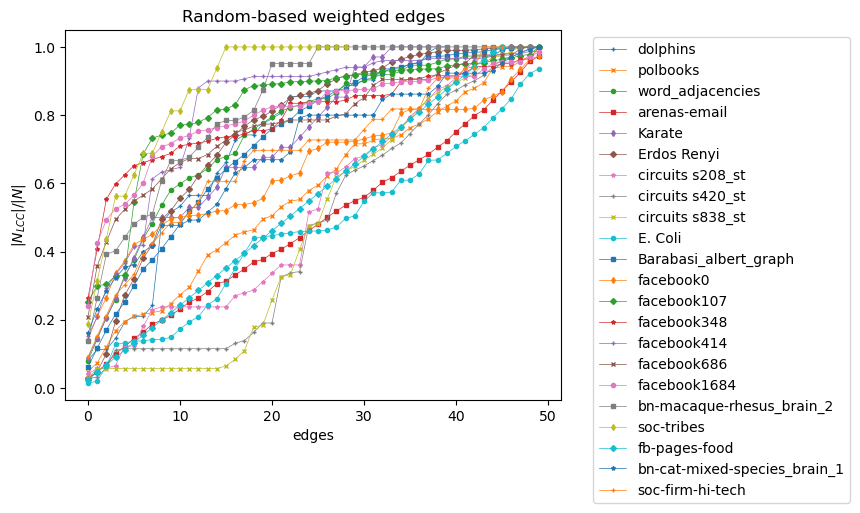

,Networks,Degree,Betweenness,Closeness,Clustering,Random
0,dolphins,23,34,35,33,38
1,polbooks,36,46,47,48,48
2,word_adjacencies,21,19,38,46,46
3,arenas-email,37,39,44,49,49
4,Karate,22,25,25,36,33
5,Erdos Renyi,31,30,40,49,46
6,circuits s208_st,41,44,45,45,46
7,circuits s420_st,46,47,48,48,49
8,circuits s838_st,46,45,46,47,47
9,E. Coli,43,49,44,49,49


In [8]:
def random_sim():
    results = []
    for network in networks.keys():
        G0 = networks[network]
        W = batch_list(list(G0.edges()))
        G = nx.Graph()
        G.add_nodes_from(G0.nodes())
        batches = batch_list(W)

        result = []
        for b in range(len(batches)):
            for (u,v) in batches[b][0]:
                G.add_edge(u, v)
            largest_component = G.subgraph(max(nx.connected_components(G), key=len))
            result.append([b, len(largest_component)/len(G)])
        results.append(result)
    return results

plot(random_sim(), 'Random')
sims_rnd = random_sim()

Rs = []
for i in range(22):
    S = sims_rnd[i]
    T, V = 0, 0
    for t, v in S:
        if v > V:
            T = t
            V = v
    Rs.append(T)
R['Random'] = Rs
pd.DataFrame(R)

In [9]:
def simulation2():
    '''Implementing reverse preferential attachment'''
    results = []
    k = 0.01
    for network in networks.keys():
        print(network)
        G0 = networks[network]
        d = nx.degree_centrality(G0)
        W = [[u, v, (1/((d[u]+k)*(d[v]+k)))] for u,v in G0.edges()]
        W = sorted(W, key=lambda x: x[2])
        G = nx.Graph()
        G.add_nodes_from(G0.nodes())
        batches = batch_list(W)

        result = []
        for b in range(len(batches)):
            for u,v,_ in batches[b]:
                G.add_edge(u, v)
            largest_component = G.subgraph(max(nx.connected_components(G), key=len))
            result.append([b, len(largest_component)/len(G)])
        results.append(result)
    return results


\dolphins\dolphins.gml
\polbooks\out2.txt
\word_adjacencies.gml\word_adjacencies.gml
\arenas-email\out2.txt
Karate
Erdos Renyi
\circuits\s208_st.txt
\circuits\s420_st.txt
\circuits\s838_st.txt
\E. Coli\E. Coli.txt
Barabasi_albert_graph
\facebook\0.edges
\facebook\107.edges
\facebook\348.edges
\facebook\414.edges
\facebook\686.edges
\facebook\1684.edges
\bn-macaque-rhesus_brain_2\bn-macaque-rhesus_brain_2.txt
\soc-tribes\soc-tribes.txt
\fb-pages-food\fb-pages-food.txt
\bn-cat-mixed-species_brain_1\bn-cat-mixed-species_brain_1.txt
\soc-firm-hi-tech\soc-firm-hi-tech.txt


<Figure size 3840x2880 with 0 Axes>

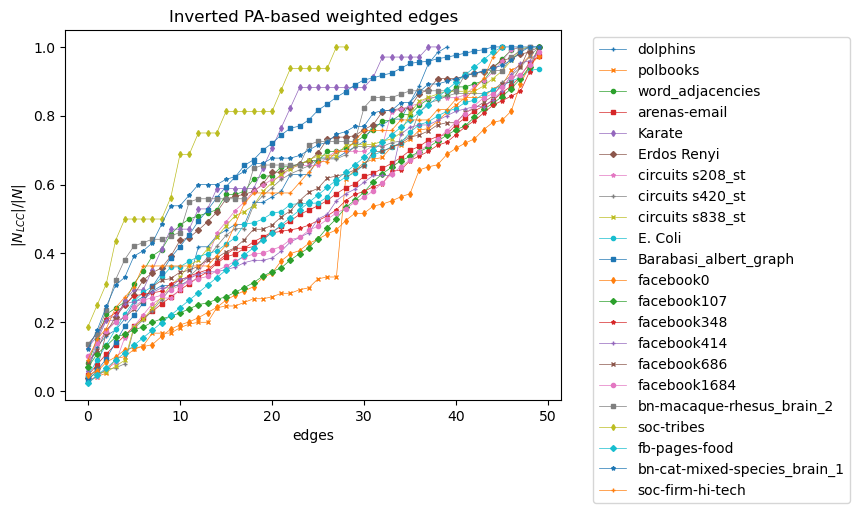

In [10]:
plot(simulation2(), 'Inverted PA')

In [11]:
sims_rnd = simulation2()

Rs = []
for i in range(22):
    S = sims_rnd[i]
    T, V = 0, 0
    for t, v in S:
        if v > V:
            T = t
            V = v
    Rs.append(T)
R['Inverted PA'] = Rs


\dolphins\dolphins.gml
\polbooks\out2.txt
\word_adjacencies.gml\word_adjacencies.gml
\arenas-email\out2.txt
Karate
Erdos Renyi
\circuits\s208_st.txt
\circuits\s420_st.txt
\circuits\s838_st.txt
\E. Coli\E. Coli.txt
Barabasi_albert_graph
\facebook\0.edges
\facebook\107.edges
\facebook\348.edges
\facebook\414.edges
\facebook\686.edges
\facebook\1684.edges
\bn-macaque-rhesus_brain_2\bn-macaque-rhesus_brain_2.txt
\soc-tribes\soc-tribes.txt
\fb-pages-food\fb-pages-food.txt
\bn-cat-mixed-species_brain_1\bn-cat-mixed-species_brain_1.txt
\soc-firm-hi-tech\soc-firm-hi-tech.txt


In [30]:
network_properties = [properties(networks[g]) for g in networks]

In [56]:
GCCs = [i for i, _,_,_,_,_ in network_properties]
ACCs = [i for _, i,_,_,_,_ in network_properties]
ds   = [i for _, _,i,_,_,_ in network_properties]
rs   = [i for _, _,_,i,_,_ in network_properties]
ASPs = [i for _, _,_,_,i,_ in network_properties]
diam = [i for _, _,_,_,_,i in network_properties]

df2 = pd.DataFrame({'Networks': name, 'GCC': GCCs, 'ACC': ACCs, 'Density': ds, 'r': rs, 'ASP': ASPs, 'Diameter': diam}) 
df2.to_csv('Data/networks properties.csv', index=False)


numeric_cols = df2.select_dtypes(include='number').columns
df_quartiles = df2[numeric_cols].apply(lambda x: pd.qcut(x.dropna(), q=[0, 0.25, 0.5, 0.75, 1.0], labels=[0.25,0.5,0.75,1]) if x.dtype != object else x)
df_quartiles['Networks'] = df2['Networks']

In [63]:
df1 = pd.DataFrame(R)

medians = df1.median()
print(medians)
for column in df1.columns :
    if column!= 'Networks':
        median = medians[column]  # Retrieve the median for the column
        df1[column] = (df1[column] < median).astype(int)


Degree         23.5
Betweenness    44.5
Closeness      39.5
Clustering     48.0
Random         48.0
Inverted PA    48.0
dtype: float64


C:\Users\Ahmad Al Musawi\AppData\Local\Temp\ipykernel_22656\1776558374.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians = df1.median()


In [72]:
Dataset = pd.merge(df_quartiles, df1, on='Networks')
Dataset = Dataset.reindex(columns = ['Networks', 'GCC', 'ACC', 'Density', 'r', 'ASP', 'Diameter', 'Degree',
       'Betweenness', 'Closeness', 'Clustering', 'Random', 'Inverted PA'])
Dataset.to_csv('Data/velnerability output.csv', index=False)
Dataset

,Networks,GCC,ACC,Density,r,ASP,Diameter,Degree,Betweenness,Closeness,Clustering,Random,Inverted PA
0,dolphins,0.75,0.75,0.75,0.50,0.75,0.75,1,1,1,1,1,1
1,polbooks,0.25,0.25,0.50,0.25,1.00,0.75,0,0,0,0,0,0
2,word_adjacencies,0.75,0.75,0.75,0.50,0.50,0.25,1,1,1,1,1,1
3,arenas-email,0.25,0.25,0.25,0.25,1.00,1.00,0,1,0,0,0,0
4,Karate,0.75,1.00,1.00,0.25,0.25,0.25,1,1,1,1,1,1
5,Erdos Renyi,0.50,0.50,0.25,0.75,0.75,0.50,0,1,0,0,1,0
6,circuits s208_st,0.50,0.50,0.50,0.75,1.00,1.00,0,1,0,1,1,1
7,circuits s420_st,0.50,0.50,0.50,0.75,1.00,1.00,0,0,0,0,0,0
8,circuits s838_st,0.50,0.50,0.25,0.75,1.00,1.00,0,0,0,1,1,0
9,E. Coli,0.25,0.25,0.25,0.25,1.00,0.75,0,0,0,0,0,0


In [85]:
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score

data = Dataset
y_binary = data.loc[:, ['Degree']]
data = data.loc[:, ['GCC', 'ACC', 'Density', 'r', 'ASP', 'Diameter']]
print (data.shape, y_binary.shape)

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(data, y_binary, test_size=0.2, random_state=19)

# Make predictions
binary_prediction = pls_da(X_train, y_train, X_test)
print ('Make predictions', binary_prediction)

# Test accuracy
accuracy = []
cval = KFold(n_splits=20, shuffle=True, random_state=19)
for train, test in cval.split(data):
    y_pred = pls_da(data[train, :], y_binary[train], data[test, :])
    accuracy.append(accuracy_score(y_binary[test], y_pred))
print("Average accuracy on 10 splits: ", np.array(accuracy).mean())


(22, 6) (22, 1)
[[ 0.05159623]
 [ 0.02876953]
 [ 0.1336862 ]
 [-0.04513238]
 [-0.15557728]
 [-0.10817639]]
Make predictions [1 0 1 1 1]


TypeError: '(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 16, 17, 18,
       19, 20, 21]), slice(None, None, None))' is an invalid key